# Classification analysis (supermarket data)

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Show version of scikit-learn
import sklearn
sklearn.__version__

/workspaces/data_analytics/Week_09


'1.5.1'

## Import titanic data

In [4]:
# Read and select variables
df_orig = pd.read_csv("supermarkets_data_enriched.csv", sep=",", encoding="utf-8")

# Number of rows and columns
print(df_orig.shape)

# First records
df_orig.head(5)

(3242, 18)


,Unnamed: 0,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,POINT (9.0379152 47.1556157),227,Schänis,3315,3876,97.142857,13.054696,1408.0
1,1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
3,3,node,9019298862,47.155185,9.038472,Lidl,supermarket,NaN,NaN,NaN,POINT (9.0384722 47.1551854),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0


## Count and remove missing values

In [7]:
# Count missing values
print(df_orig.isna().sum())

df_orig = df_orig[['id', 'bfs_name', 'bfs_number', 'lat', 'lon', 'brand', 'pop', 'pop_dens', 'frg_pct', 'emp']]
# Remove missing values
df_supermarkets = df_orig.dropna(subset=['id','bfs_name','bfs_number', 'lat','lon','brand','pop','pop_dens','frg_pct','emp'])

Unnamed: 0             0
type                   0
id                     0
lat                    0
lon                    0
brand               1233
shop                   0
addr:city           1795
addr:housenumber    1690
addr:postcode       1721
geometry               0
index_right            0
bfs_name               0
bfs_number             0
pop                    0
pop_dens               0
frg_pct                0
emp                   45
dtype: int64


## Create a subset named ‘df_sub’ with only ‘Migros’ and ‘Volg’ as brands.

In [8]:
df_sub = df_supermarkets[df_supermarkets['brand'].isin(['Migros', 'Volg'])]
df_sub.head()

,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0
8,48932835,Zürich,261,47.375020,8.522895,Migros,420217,4778.994655,32.458468,491193.0
11,83330862,Zürich,261,47.344749,8.529981,Migros,420217,4778.994655,32.458468,491193.0
12,119249170,Zürich,261,47.375255,8.536107,Migros,420217,4778.994655,32.458468,491193.0
15,262400822,Zürich,261,47.364072,8.530945,Migros,420217,4778.994655,32.458468,491193.0


## Create train/test samples (X_train, y_train, X_test, y_test) based on df_sub.

In [14]:
X = df_sub[['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']]
y = df_sub['brand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('X_train:')
print(X_train.head(), '\n')

print('y_train:')
print(y_train.head())

X_train:
            lat       lon     pop      pop_dens    frg_pct       emp
427   46.767777  9.062487    1728     17.891903   8.217593     725.0
271   47.552670  7.592713  173232   7263.396226  37.955459  185432.0
1149  46.203871  6.146234  203951  12810.992462  47.954656  186620.0
2655  46.774599  9.207659    4757     35.638298  16.312802    3229.0
2369  47.126317  7.246363    6872   4521.052632  26.062282    3185.0 

y_train:
427       Volg
271     Migros
1149    Migros
2655    Migros
2369    Migros
Name: brand, dtype: object


In [20]:
# Fit the classification tree model
clf = DecisionTreeClassifier(random_state=20, max_depth=6)
clf = clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print the predictions
print("Predictions:")
print(y_pred)

Predictions:
['Migros' 'Migros' 'Migros' 'Migros' 'Volg' 'Migros' 'Migros' 'Migros'
 'Volg' 'Migros' 'Volg' 'Migros' 'Migros' 'Migros' 'Migros' 'Volg' 'Volg'
 'Volg' 'Volg' 'Volg' 'Volg' 'Migros' 'Migros' 'Migros' 'Migros' 'Volg'
 'Volg' 'Migros' 'Volg' 'Migros' 'Migros' 'Volg' 'Migros' 'Migros'
 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros'
 'Volg' 'Volg' 'Volg' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros'
 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Volg' 'Migros'
 'Volg' 'Volg' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros'
 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Volg' 'Migros'
 'Migros' 'Volg' 'Migros' 'Migros' 'Migros' 'Migros' 'Volg' 'Migros'
 'Volg' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros'
 'Migros' 'Volg' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Volg'
 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros'
 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Migros' 'Volg'

## Print a text representation of the classification tree.

In [21]:

text_rep = tree.export_text(clf, feature_names=list(X_train.columns))
print(text_rep)

|--- emp <= 1399.00
|   |--- pop <= 2598.50
|   |   |--- lat <= 46.35
|   |   |   |--- emp <= 512.50
|   |   |   |   |--- emp <= 244.50
|   |   |   |   |   |--- class: Volg
|   |   |   |   |--- emp >  244.50
|   |   |   |   |   |--- class: Migros
|   |   |   |--- emp >  512.50
|   |   |   |   |--- class: Volg
|   |   |--- lat >  46.35
|   |   |   |--- emp <= 824.00
|   |   |   |   |--- class: Volg
|   |   |   |--- emp >  824.00
|   |   |   |   |--- emp <= 856.50
|   |   |   |   |   |--- class: Migros
|   |   |   |   |--- emp >  856.50
|   |   |   |   |   |--- lat <= 47.58
|   |   |   |   |   |   |--- class: Volg
|   |   |   |   |   |--- lat >  47.58
|   |   |   |   |   |   |--- class: Migros
|   |--- pop >  2598.50
|   |   |--- lat <= 46.87
|   |   |   |--- frg_pct <= 30.43
|   |   |   |   |--- pop_dens <= 21.35
|   |   |   |   |   |--- class: Volg
|   |   |   |   |--- pop_dens >  21.35
|   |   |   |   |   |--- class: Migros
|   |   |   |--- frg_pct >  30.43
|   |   |   |   |--- class:

## Visualize the classification tree.

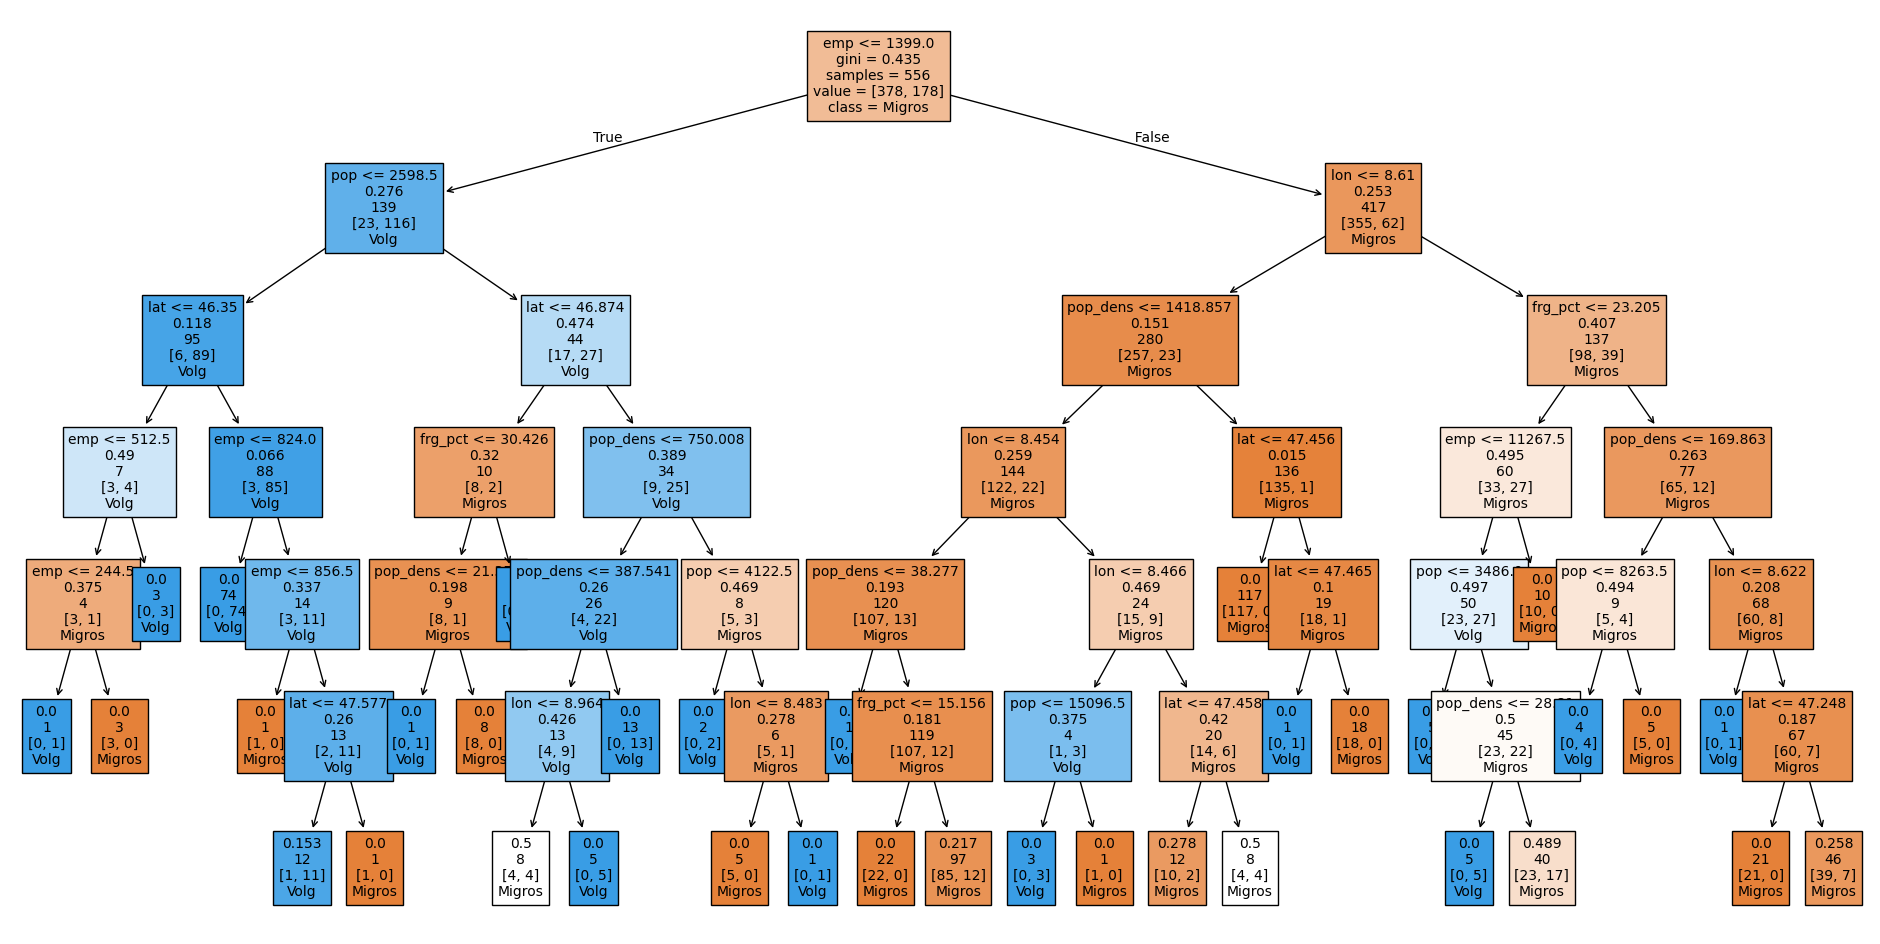

In [22]:
fig = plt.figure(figsize=(24,12))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['Migros', 'Volg'],
                   filled=True,
                   fontsize=10,
                   label='root')
plt.show()

## Print the confusion matrix and classification report of the model.

## Print the ROC curve and AUC of the model.

Confusion Matrix:
[[98 10]
 [ 7 25]]

Classification Report:
              precision    recall  f1-score   support

      Migros       0.93      0.91      0.92       108
        Volg       0.71      0.78      0.75        32

    accuracy                           0.88       140
   macro avg       0.82      0.84      0.83       140
weighted avg       0.88      0.88      0.88       140



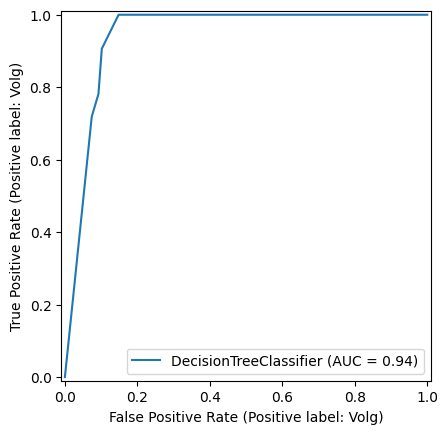

In [23]:
# Predict the test set results
y_pred = clf.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the ROC curve and AUC of the model
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

## c) 

Confusion Matrix:
[[94 14]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

      Migros       0.97      0.87      0.92       108
        Volg       0.67      0.91      0.77        32

    accuracy                           0.88       140
   macro avg       0.82      0.89      0.85       140
weighted avg       0.90      0.88      0.88       140



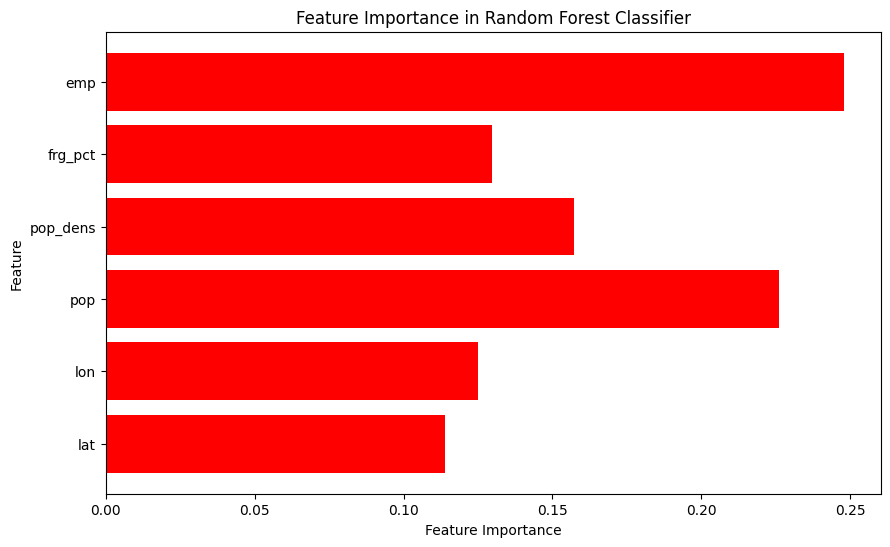

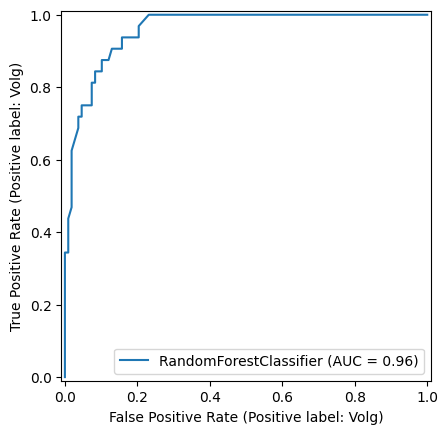

In [26]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.20, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X2_train, y2_train)
y2_pred = rf_clf.predict(X2_test)

print("Confusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))

print("\nClassification Report:")
print(classification_report(y2_test, y2_pred))

feature_importances = rf_clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

# Print the ROC curve and AUC of the model
RocCurveDisplay.from_estimator(rf_clf, X2_test, y2_test)
plt.show()